# Evolutionary Computation - Assignment 9 Report

* Kajetan Sulwiński 151954
* Mikołaj Marmurowicz 151956

In [23]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.cm import ScalarMappable
from matplotlib import MatplotlibDeprecationWarning
import warnings

In [24]:
dfTSPA = pd.read_csv('.\\TSPA.csv', sep=';', names=['X', 'Y', 'Cost'])
dfTSPB = pd.read_csv('.\\TSPB.csv', sep=';', names=['X', 'Y', 'Cost'])

min_cost_A = dfTSPA['Cost'].min()
max_cost_A = dfTSPA['Cost'].max()
dfTSPA['Normalized_Cost'] = (dfTSPA['Cost'] - min_cost_A) / (max_cost_A - min_cost_A)

min_cost_B = dfTSPB['Cost'].min()
max_cost_B = dfTSPB['Cost'].max()
dfTSPB['Normalized_Cost'] = (dfTSPB['Cost'] - min_cost_B) / (max_cost_B - min_cost_B)

## Problem description

### Problem

We were to find a cycle that consisted of exactly 50% of the available nodes, where each node had its own cost along with x and y coordinates. The objective function was a sum of node costs and distances (Euclidean) between each traveled node. 

### Solution implementation

We have added a new method - Hybrid evolutionary algorithm with two different recombination operators.

* **Hybrid evolutionary algorithm**

    * **Input:**
        - `costDistanceInfo` : A symmetric matrix of distances and costs between nodes
        - `popSize` : The size of a population
        - `maxRuntime` : The maximum runtime of the algorithm
        - `recombinationFunction` : A function that combines two parents
        - `useLocalSearchAfterRecombination` : A boolean value determining whether to use local search on children

    * **Output:**
        - An array of new `cycle` node IDs

    * **Function:**

        ```python
        FUNCTION generateCycle()
            population = []
            while size(population) < popSize:
            candidate = generateRandomSolution()
            candidate = localSearch(candidate)
            if population does not contain candidate:
                population.add(candidate)
            population = sortByObjectiveFunction(population)
            timeStart = timeNow()
            currTime = timeNow()
            while currTime - timeStart < maxRuntime:
                parentA, parentB = selectParents(population)
                Child = recombinationFunction(parentA, parentB)
                if useLocalSearchAfterRecombination:
                    child = localSearch(child)
                childIndexToInsert = popSize
                addChild = true
                for i from popSize - 1 to 0:
                    if objectiveFunction(child) > objectiveFunction(population[i]):
                        Break
                    else if objectiveFunction(child) == objectiveFunction(population[i]):
                        addChild = false # If child has the same evaluation as a solution in population, skip the child as it is most likely a duplicate
                        Break
                    childIndexToInsert = i
                if addChild and childIndexToInsert < popSize:
                    population = insertElementAtPosition(population, child, childIndexToInsert)
                    population = removeLastElement(population)
                currTime = timeNow()
            return population[0]
        END FUNCTION

        FUNCTION recombination1(parentA, parentB)
            commonSubcomponents = findCommonComponentsInCycles(parentA, parentB)
            commonElements = flatten(commonSubcomponents)
            unusedNodes = []
            for i from 0 to costDIstanceInfo.numberOfNodes():
                If i not in commonElements:
                    unusedNodes.add(i)
            shuffle(commonSubcomponents)
            shuffle(unusedNodes)
            gapsSizeTotal = size(parentA) - size(commonElements):
            gapSizes = []
            gapCount = size(commonSubcomponents):
            for i from 0 to gapCount:
                gap = generateRandomIntInRange(0, gapsSizeTotal)
                gapsSizeTotal -= gap
                gapSizes.add(gap)
            gapSizes.add(gapSizeTotal)
            shuffle(gapSizes)
            child = []
            while size(commonSubcomponents) > 0:
                gap = gapSizes.pop()
        For i from 0 to gap:
            nodeIdToAdd = unusedNodes.pop()
            child.add(nodeIdToAdd)
        commonComponent = commonSubcomponents.pop()
        For nodeId in commonComponent:
            child.add(nodeId)
            gap = gapSizes.pop()
        for i from 0 to gap:
        nodeIdToAdd = unusedNodes.pop()
            child.add(nodeIdToAdd)
        return child
        END FUNCTION

        FUNCTION recombination2(parentA, parentB)
            commonSubcomponents =  findCommonComponentsInCycles(parentA, parentB)
            shuffle(commonSubcomponents)
            childPartial = flatten(commonSubcomponents)
            child = generate2RegretGreedyCycle(childPartial) 
            return child
        END FUNCTION
        ```

## Presenting the results

### Results presented as minimum, average and maximum of objective function

Presented in a table below, each method and each problem instance is shown.

In [25]:
file_paths = ['..\\Lab6\\TSPA_IteratedLocalSearch.csv', '..\\Lab6\\TSPA_MultistartLocalSearch.csv',
              '..\\Lab7\\TSPA_LnsNoLS.csv', '..\\Lab7\\TSPA_LnsWithLS.csv',
              '.\\TSPALocalSearchAfterRecombComplexRecomb.csv', '.\\TSPALocalSearchAfterRecombSimpleRecomb.csv',
              '.\\TSPANoLocalSearchAfterRecomdComplexRecomb.csv',
              '..\\Lab6\\TSPB_IteratedLocalSearch.csv', '..\\Lab6\\TSPB_MultistartLocalSearch.csv',
              '..\\Lab7\\TSPB_LnsNoLS.csv', '..\\Lab7\\TSPB_LnsWithLS.csv',
              '.\\TSPBLocalSearchAfterRecombComplexRecomb.csv', '.\\TSPBLocalSearchAfterRecombSimpleRecomb.csv',
              '.\\TSPBNoLocalSearchAfterRecomdComplexRecomb.csv', '.\\TSPBNoLocalSearchAfterRecomdSimpleRecomb.csv'] 
methods = ['Iterated LS 20 runs', 'Multiple start LS 20 runs', "LNS No LS 20 runs", "LNS With LS 20 runs", 
           "Evolutionary - Complex Recomb. - LS", "Evolutionary - Simple Recomb. - LS", "Evolutionary - Complex Recomb. - No LS"]
results = []
best_solutions = []
counter = 0
for file_path, method in zip(file_paths, methods * 2):
    df = pd.read_csv(file_path)
    costs = df.iloc[:, -1]
    minimum = costs.min()
    maximum = costs.max()
    mean = round(costs.mean(), 2)
    if counter < len(methods):
        results.append((method, 'TSPA', f"{mean} ({minimum} - {maximum})"))
    else:
        results.append((method, 'TSPB', f"{mean} ({minimum} - {maximum})"))
    if '..' not in file_path:
        min_sol = df.loc[costs.idxmin()][:-1].to_list()
        best_solutions.append(min_sol)
    counter += 1
# Results from previous reports
results.append(("Greedy LS (Edges) on 2-Regret Weighted 200 runs", "TSPA", "71509.42 (70571 - 72485)"))
results.append(("Greedy LS (Edges) on 2-Regret Weighted 200 runs", "TSPB", "50033.92 (45855 - 54814)"))
results.append(("Steepest LS (Edges) on 2-Regret Weighted 200 runs", "TSPA", "71470.14 (70510 - 72614)"))
results.append(("Steepest LS (Edges) on 2-Regret Weighted 200 runs", "TSPB", "49895.7 (45867 - 54814)"))
result_df = pd.DataFrame(results, columns=['Method', 'Column', 'Value'])
result_df = result_df.pivot(index='Method', columns='Column', values='Value')
result_df.columns.name = None
result_df

,TSPA,TSPB
Method,,
Evolutionary - Complex Recomb. - LS,70044.63 (69829 - 70257),44466.32 (44015 - 44784)
Evolutionary - Complex Recomb. - No LS,71707.53 (71654 - 71807),47066.53 (46314 - 47530)
Evolutionary - Simple Recomb. - LS,70891.79 (70534 - 71264),45118.74 (44676 - 45466)
Greedy LS (Edges) on 2-Regret Weighted 200 runs,71509.42 (70571 - 72485),50033.92 (45855 - 54814)
Iterated LS 20 runs,69256.11 (69095 - 69614),43634.53 (43448 - 44215)
LNS No LS 20 runs,70097.05 (69336 - 71100),44849.16 (43961 - 47055)
LNS With LS 20 runs,70020.58 (69373 - 71128),44481.84 (43845 - 45540)
Multiple start LS 20 runs,71250.74 (70684 - 71957),45795.84 (45108 - 46295)
Steepest LS (Edges) on 2-Regret Weighted 200 runs,71470.14 (70510 - 72614),49895.7 (45867 - 54814)


Information regarding running time and iterations of main loop of different methods.

In [26]:
times_files = ['..\\Lab6\\times.csv', '..\\Lab6\\ILSruns.csv']

results_times = []
for counter_main, file in enumerate(times_files):
    df_temp = pd.read_csv(file, header=None).iloc[:, :-1]
    for count, column in enumerate(df_temp.columns):
        min_value = df_temp[column].min()
        max_value = df_temp[column].max()
        avg_value = df_temp[column].mean()
        if counter_main < 1:
            if count < 1:
                results_times.append(('Multiple start LS', 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) ms"))
            else:
                results_times.append(('Multiple start LS', 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) ms"))
        else:
            if count < 1:
                results_times.append(('Iterated LS', 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
            else:
                results_times.append(('Iterated LS', 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))

times_files = ['..\\Lab7\\TSPA_LnsNoLS_iters.csv', '..\\Lab7\\TSPA_LnsWithLS_iters.csv', '..\\Lab7\\TSPB_LnsNoLS_iters.csv', '..\\Lab7\\TSPB_LnsWithLS_iters.csv',
               '.\\TSPALocalSearchAfterRecombComplexRecombRUNS.csv', '.\\TSPALocalSearchAfterRecombSimpleRecombRUNS.csv', '.\\TSPANoLocalSearchAfterRecomdComplexRecombRUNS.csv',
               '.\\TSPBLocalSearchAfterRecombComplexRecombRUNS.csv', '.\\TSPBLocalSearchAfterRecombSimpleRecombRUNS.csv', '.\\TSPBNoLocalSearchAfterRecomdComplexRecombRUNS.csv',]

for counter_main, file in enumerate(times_files):
    df_temp = pd.read_csv(file, header=None)
    for count, column in enumerate(df_temp.columns):
        min_value = df_temp[column].min()
        max_value = df_temp[column].max()
        avg_value = df_temp[column].mean()
        if file ==  '..\\Lab7\\TSPA_LnsNoLS_iters.csv':
            results_times.append(('LNS No LS', 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  '..\\Lab7\\TSPA_LnsWithLS_iters.csv':
            results_times.append(('LNS With LS', 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  '..\\Lab7\\TSPB_LnsNoLS_iters.csv':
            results_times.append(('LNS No LS', 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  '..\\Lab7\\TSPB_LnsWithLS_iters.csv':
            results_times.append(('LNS With LS', 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-6]:
            results_times.append(("Evolutionary - Complex Recomb. - LS", 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-5]:
            results_times.append(("Evolutionary - Simple Recomb. - LS", 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-4]:
            results_times.append(("Evolutionary - Complex Recomb. - No LS", 'TSPA', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-3]:
            results_times.append(("Evolutionary - Complex Recomb. - LS", 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-2]:
            results_times.append(("Evolutionary - Simple Recomb. - LS", 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
        if file ==  times_files[-1]:
            results_times.append(("Evolutionary - Complex Recomb. - No LS", 'TSPB', f"{round(avg_value, 4)} ({round(min_value, 4)} - {round(max_value, 4)}) runs"))
times_df = pd.DataFrame(results_times, columns=['Method', 'Column', 'Value'])
times_df = times_df.pivot(index='Method', columns='Column', values='Value')
times_df.columns.name = None  
times_df

,TSPA,TSPB
Method,,
Evolutionary - Complex Recomb. - LS,173.1 (164 - 188) runs,266.7 (256 - 279) runs
Evolutionary - Complex Recomb. - No LS,2397.2 (2284 - 2536) runs,3043.95 (2898 - 3163) runs
Evolutionary - Simple Recomb. - LS,133.7 (124 - 197) runs,204.35 (201 - 207) runs
Iterated LS,2602.95 (2358 - 2823) runs,2611.65 (2416 - 2886) runs
LNS No LS,4271.3 (4105 - 4412) runs,3747.8 (2524 - 4215) runs
LNS With LS,3460.75 (2903 - 3698) runs,2837.95 (1847 - 3562) runs
Multiple start LS,36404.82 (33524.3 - 38601.8) ms,34441.575 (33030.7 - 38215.2) ms


### Visualization of the best path for each method

Additionally, a list of node indices is presented.

Evolutionary - Complex Recomb. - LS
TSPA
[4, 84, 35, 184, 190, 10, 177, 54, 48, 160, 34, 181, 146, 22, 159, 193, 41, 139, 46, 68, 69, 18, 108, 140, 93, 117, 0, 143, 183, 89, 23, 137, 176, 51, 118, 59, 115, 5, 42, 43, 116, 65, 131, 149, 123, 162, 151, 133, 80, 79, 63, 94, 124, 148, 9, 62, 102, 144, 14, 49, 178, 106, 52, 55, 185, 40, 165, 90, 81, 196, 157, 31, 113, 175, 171, 16, 25, 44, 120, 78, 145, 92, 57, 129, 2, 152, 97, 1, 101, 75, 86, 26, 100, 53, 180, 154, 135, 70, 127, 112]
TSPB
[145, 15, 3, 70, 161, 132, 169, 188, 6, 147, 191, 90, 51, 121, 131, 122, 133, 10, 107, 40, 63, 135, 38, 27, 16, 1, 198, 117, 193, 31, 54, 73, 190, 80, 162, 45, 175, 78, 5, 177, 36, 61, 91, 141, 77, 81, 153, 187, 163, 89, 127, 137, 114, 103, 113, 176, 194, 166, 86, 185, 95, 130, 99, 179, 94, 47, 148, 60, 20, 28, 149, 4, 140, 183, 152, 34, 55, 18, 62, 124, 106, 143, 35, 109, 0, 29, 111, 82, 21, 8, 104, 144, 160, 33, 138, 11, 139, 168, 195, 13]


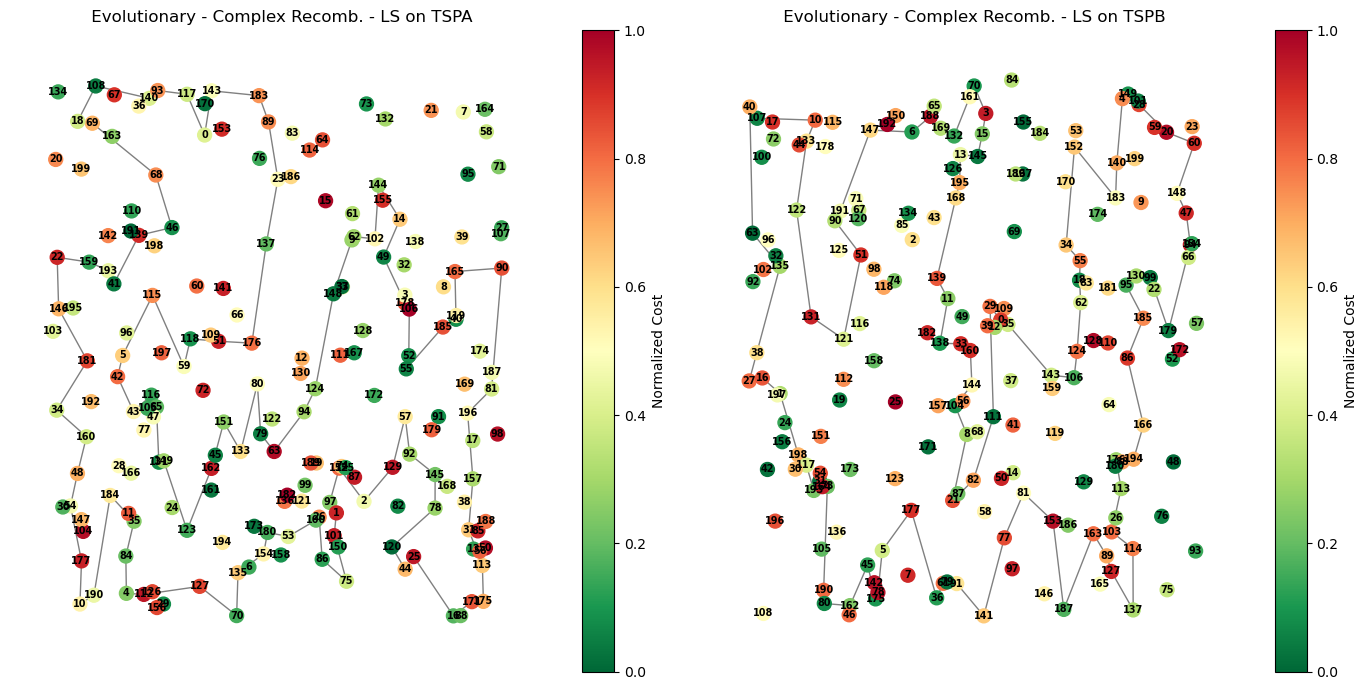

Evolutionary - Simple Recomb. - LS
TSPA
[2, 129, 92, 57, 55, 52, 106, 178, 3, 185, 40, 165, 90, 81, 196, 179, 145, 78, 31, 56, 113, 175, 171, 16, 25, 44, 120, 75, 86, 101, 1, 97, 26, 100, 121, 53, 180, 154, 135, 70, 127, 123, 162, 133, 151, 51, 118, 59, 115, 198, 46, 68, 139, 41, 193, 159, 181, 42, 43, 116, 65, 149, 131, 35, 184, 84, 112, 4, 10, 177, 54, 160, 34, 146, 22, 18, 69, 108, 140, 93, 117, 0, 143, 183, 89, 137, 176, 80, 79, 63, 94, 124, 148, 9, 62, 144, 14, 49, 167, 152]
TSPB
[153, 81, 77, 141, 91, 61, 36, 177, 5, 78, 175, 142, 45, 80, 190, 136, 73, 164, 54, 31, 193, 117, 198, 121, 131, 135, 63, 100, 40, 107, 133, 122, 90, 191, 125, 51, 147, 6, 188, 169, 132, 13, 70, 3, 15, 145, 195, 168, 43, 139, 11, 182, 138, 104, 8, 21, 82, 111, 144, 33, 160, 29, 0, 109, 35, 143, 159, 106, 124, 128, 62, 18, 55, 34, 170, 152, 183, 140, 28, 20, 60, 148, 47, 94, 66, 179, 99, 130, 95, 185, 86, 166, 194, 176, 113, 103, 127, 89, 163, 187]


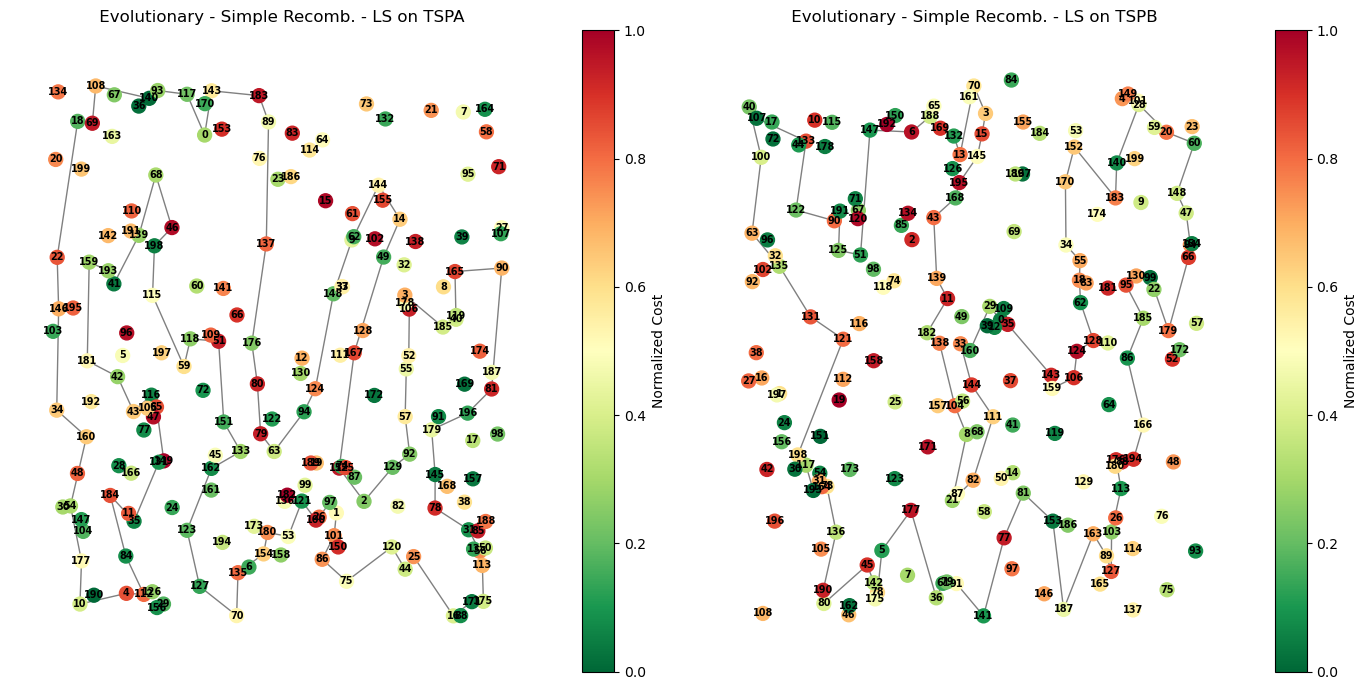

Evolutionary - Complex Recomb. - No LS
TSPA
[44, 16, 171, 175, 113, 56, 31, 157, 196, 81, 90, 27, 164, 39, 165, 119, 40, 185, 55, 52, 106, 178, 3, 14, 49, 102, 144, 62, 9, 148, 137, 23, 186, 89, 183, 143, 0, 117, 93, 108, 18, 22, 159, 193, 41, 139, 46, 115, 59, 149, 131, 65, 116, 43, 42, 181, 34, 160, 48, 54, 177, 10, 190, 184, 84, 112, 123, 127, 70, 135, 162, 118, 51, 176, 80, 151, 133, 79, 122, 124, 94, 63, 180, 154, 53, 100, 26, 97, 152, 1, 101, 86, 75, 2, 129, 57, 92, 145, 78, 120]
TSPB
[31, 193, 117, 198, 112, 121, 131, 1, 156, 16, 27, 38, 63, 135, 122, 133, 90, 51, 147, 6, 188, 169, 132, 70, 3, 145, 13, 195, 168, 139, 11, 182, 138, 104, 8, 111, 144, 33, 160, 29, 0, 109, 35, 34, 55, 18, 62, 143, 106, 124, 128, 95, 183, 140, 152, 4, 149, 28, 20, 148, 47, 94, 179, 185, 86, 166, 194, 176, 180, 113, 103, 114, 137, 127, 89, 163, 165, 187, 153, 81, 77, 97, 141, 91, 79, 36, 61, 82, 21, 177, 5, 78, 175, 142, 45, 80, 190, 136, 73, 54]


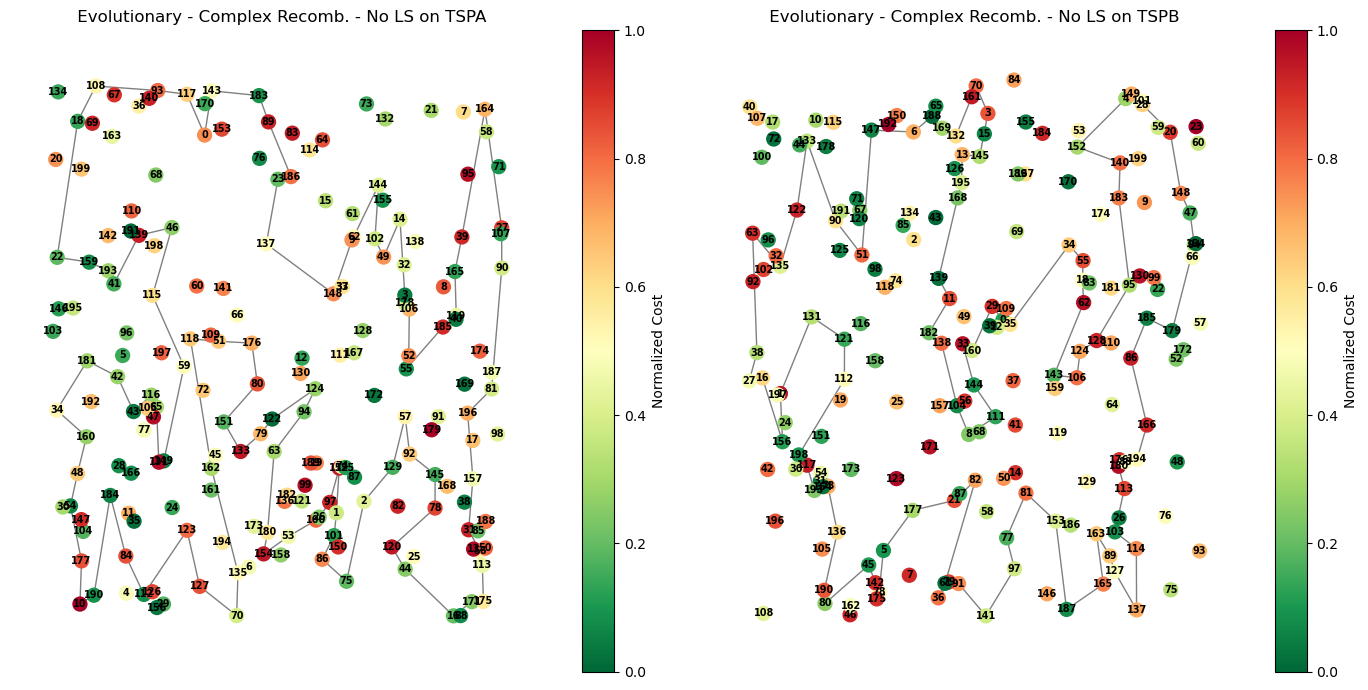

In [29]:
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
cmap = plt.cm.get_cmap('RdYlGn_r')

for count, method in enumerate(methods[4:]):
    if count == len(best_solutions) // 2:
        break
    print(method)
    print('TSPA')
    print(best_solutions[count])
    print('TSPB')
    print(best_solutions[count + len(best_solutions)//2])

    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    for count, sol in enumerate([best_solutions[count], best_solutions[count + len(best_solutions)//2]]):
        if count == 0:
            df_temp = dfTSPA
            ax = axs[0]
            instance = 'TSPA'
        else:
            df_temp = dfTSPB
            ax = axs[1]
            instance = 'TSPB'

        G = nx.Graph()
        positions = {}

        for idx in sol:
            G.add_node(idx, size=df_temp.loc[idx, 'Normalized_Cost'])
            positions[idx] = (df_temp.loc[idx, 'X'], df_temp.loc[idx, 'Y'])

        for idx in [i for i in range(0,200) if i not in sol]:
            G.add_node(idx, size=df_temp.loc[idx, 'Normalized_Cost'])
            positions[idx] = (df_temp.loc[idx, 'X'], df_temp.loc[idx, 'Y'])

        for i in range(len(sol) - 1):
            G.add_edge(sol[i], sol[i + 1])
        G.add_edge(sol[-1], sol[0])


        normalized_costs = df_temp['Normalized_Cost']
        norm = mcolors.Normalize(vmin=normalized_costs.min(), vmax=normalized_costs.max())
        node_colors = [cmap(norm(df_temp.loc[idx, 'Normalized_Cost'])) for idx in range(0, 200)]

        nx.draw(G, pos=positions, with_labels=True, node_color=node_colors, node_size=100,
            font_size=7, edge_color='gray', linewidths=1, font_weight='bold', ax=ax)

        sm = ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        cbar = plt.colorbar(sm, ax=ax)
        cbar.set_label('Normalized Cost')

        ax.set_title(f" {method} on {instance}")

    plt.tight_layout()
    plt.show()

## Additional Information

### Solution checker

We have checked all of the best solutions via the solution checker provided.

### Source code link

The source code is available in a repository [here](https://github.com/Mickeyo0o/EvolutionaryComp/tree/main/Lab9) under the Lab9 folder.

## Conclusions

The results of the evolutionary methods highlight the significant impact of both recombination complexity and the use of local search (LS). Complex Recombination with LS outperforms every other evolutionary configuration in terms of the objective function value. Additionally, it is able to outperform the number of iterations of Simple Recombinations with LS. That is because of the LS's ability to refine solutions after initial recombination, effectively exploiting local optima. In contrast, Complex Recombination without LS shows drastically higher number of iterations and broader ranges of objective value function, as not using LS leaves the method reliant solely on recombination, which is slower and less precise. Simple Recombination with LS objective function value results ten to be slightly worse to Complex Recombination with LS, as the recombination operator lack the depth to explore solution space thouroughly. When compared to methods like Iterated LS or LNS, evolutionary methods excel in smaller problem instances due to their efficient population-based exploration, though they face more runtime challenges in larger instances, highlighting that recombination complexity and LS integration are critical to their performance.

## Authors

* Kajetan Sulwiński 151954
* Mikołaj Marmurowicz 151956